# **Проектная работа по курсу Исследовательский анализ данных**

В проекте представлены данные сервиса Яндекс Недвижимость — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах.

Описание данных:

*   airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
*   balcony — число балконов
*   ceiling_height — высота потолков (м)
*   cityCenters_nearest — расстояние до центра города (м)
*   days_exposition — сколько дней было размещено объявление (от публикации до снятия)
*   first_day_exposition — дата публикации
*   floor — этаж
*   floors_total — всего этажей в доме
*   is_apartment — апартаменты (булев тип)
*   kitchen_area — площадь кухни в квадратных метрах (м²)
*   last_price — цена на момент снятия с публикации
*   living_area — жилая площадь в квадратных метрах (м²)
*   locality_name — название населённого пункта
*   open_plan — свободная планировка (булев тип)
*   parks_around3000 — число парков в радиусе 3 км
*   parks_nearest — расстояние до ближайшего парка (м)
*   ponds_around3000 — число водоёмов в радиусе 3 км
*   ponds_nearest — расстояние до ближайшего водоёма (м)
*   rooms — число комнат
*   studio — квартира-студия (булев тип)
*   total_area — общая площадь квартиры в квадратных метрах (м²)
*   total_images — число фотографий квартиры в объявлении

Проверяемые гипотезы:
1. На стоимость квартир влияет их общая площадь;
2. На стоимость квартир влияет их удаленность от центра;
3. Стоимость квартир возрастает со временем.


# **1. Подключение используемых библиотек и загрузка данных**

## 1.1 Импорт библиотек, загрузка данных из csv-файла в датафрейм, сохранение в переменную data.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

Вывод первых 20 строк датафрейма data на экран.

In [ ]:
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


## 1.2 Основная информация о датафрейме с помощью метода info()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Следует исправить название столбца.

In [ ]:
data.rename(columns={'cityCenters_nearest':'city_centers_nearest'}, inplace = True)

Процентное количество пропусков по каждому параметру.

In [ ]:
for col in data.columns:
    missing = np.mean(data[col].isnull())
    print('{} - {}%'.format(col, round(missing*100)))

total_images - 0%
last_price - 0%
total_area - 0%
first_day_exposition - 0%
rooms - 0%
ceiling_height - 39%
floors_total - 0%
living_area - 8%
floor - 0%
is_apartment - 88%
studio - 0%
open_plan - 0%
kitchen_area - 10%
balcony - 49%
locality_name - 0%
airports_nearest - 23%
city_centers_nearest - 23%
parks_around3000 - 23%
parks_nearest - 66%
ponds_around3000 - 23%
ponds_nearest - 62%
days_exposition - 13%



**Выводы**

Предварительно можно утверждать, что, данных достаточно для проверки гипотез: 
* количество строк - 23699, 
* количество колонок - 22.

Данные представлены типами: bool(2), float64(14), int64(3), object(3).

В данных присутсвует значительное количество пропусков.


## 1.3 Построение гистограмм для всех столбцов датафрейма.

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'city_centers_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], 

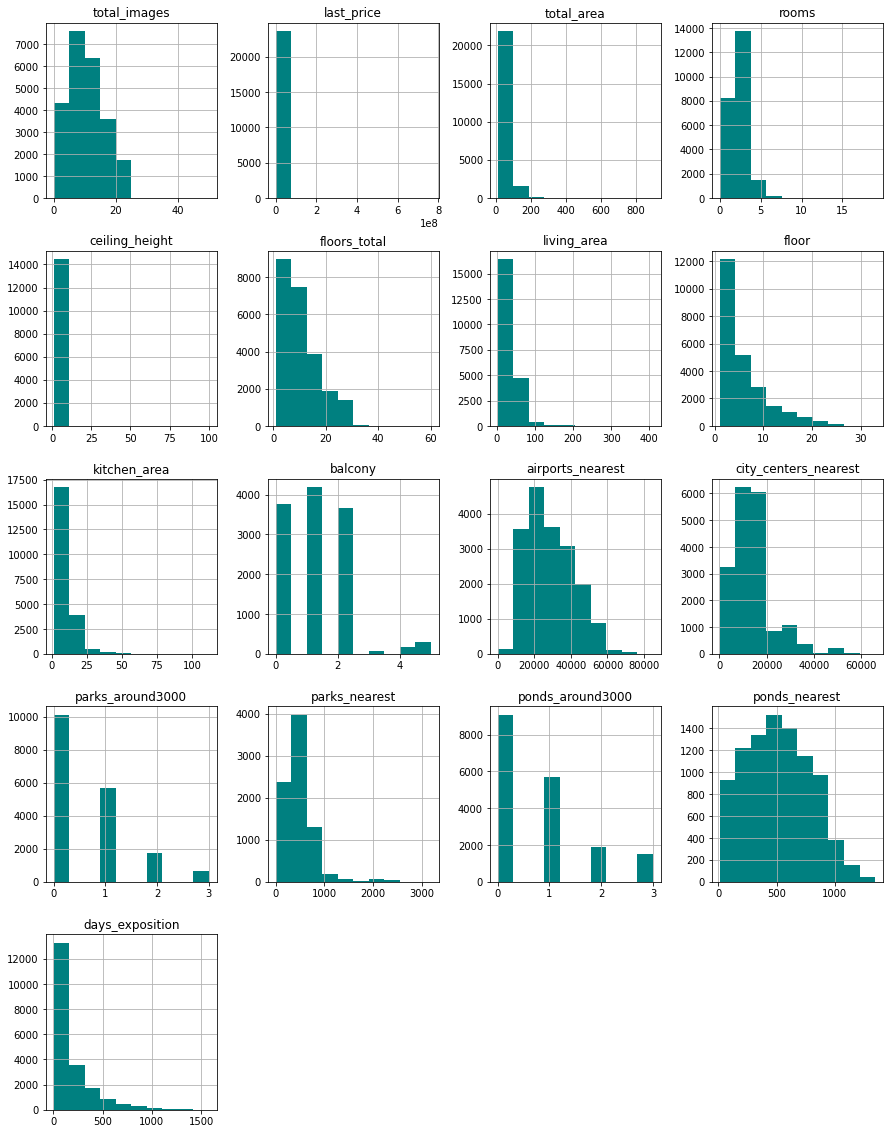

In [ ]:
data.hist(figsize=(15, 20), color ='teal')

Из полученных гистограмм можно сделать следующие выводы:
*    Данные распределениы неравномерно, на многих графиках присутсвуют выбросы - аномально большие значения, смещающие графики влево.
*    Параметры parks_around3000, ponds_around3000, balcony - дискретные


# **2. Предобработка данных**

## 2.1 Работа с пропусками

Количество пропущенных значений для каждого столбца.

In [ ]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Очень много пропущенных значений в следующих столбцах:
* 'is_apartment' - 20924 (88%), 
* 'parks_nearest' - 15620 (65,9%), 
* 'ponds_nearest' - 14589 (61,5%),
* 'balcony' - 11519 (48,6%)
* 'ceiling_height' - 9195 (38,8%)

Около 23% составляют пропуски в 'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'ponds_around3000' 

Для параметра 'is_apartment' можно было бы предположить, что пропускам соответсвует значение False, однако уверенно это сказать нельзя.

Для параметров 'parks_around3000', 'ponds_around3000' и 'balcony' можно предположить, что пропускам соответсвует значение '0'.

Пропуски в столбце 'locality_name' можно заменить на Санкт-Петербург для тех объявлений, где расстояние до центра больше 10000, предполагая, что в остальных населенных пунктах оно меньше.

Предполагая, что пропуски в столбцах 'parks_around3000', 'ponds_around3000', 'balcony' вызваны их отсутсвием, заменим NaN на 0.

In [ ]:
data[['parks_around3000', 'ponds_around3000', 'balcony']] = data[['parks_around3000', 'ponds_around3000', 'balcony']].fillna(value=0)

Параметры 'ceiling_height', 'living_area', 'kitchen_area' можно заполнить типичными значениями.

Для высоты потолков возьмем медианное значение.

In [ ]:
data['ceiling_height'] = data['ceiling_height'].fillna(value=data['ceiling_height'].median())

Для заполнения пропусков в жилой площади и площади кухни можно рассчитать их соотношение к общей площади.

In [ ]:
living_by_total = data['living_area'].median()/data['total_area'].median()
kitchen_by_total = data['kitchen_area'].median()/data['total_area'].median()

In [ ]:
data['living_area'] = data['living_area'].fillna(value=data['total_area']*living_by_total)
data['kitchen_area'] = data['kitchen_area'].fillna(value=data['total_area']*kitchen_by_total)

Проверка заполнения пропусков.

In [ ]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area                 0
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [ ]:
#Можно ли исходить из расстояния до центра, предполагая более высокие значения для Санкт-Петербурга
data[data['locality_name'] != 'Санкт-Петербург']['city_centers_nearest'].mean()

30286.19246031746

Пропуски в следующих параметрах оставлены:

* floors_total - можно взять среднее значение этажности, а там, где квартиры располагаются выше него, предположить последний этаж. Но это грубо.
* is_apartment - очень много пропусков. Можно попробовать угадать, относится ли объект к жилым квартирам исходя из площади (апартаменты как правило отличаются от стандартных площадей) и количества комнат. Высокой точности не будет, а параметр, предполагаемо, существенно влияет на стоимость.
* airports_nearest, city_centers_nearest, parks_nearest, ponds_nearest - заполнить средними расстояниями, но ценность их сомнительна.


## 2.2 Изменение типа данных

Изменение формата даты публикации.

In [ ]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Значения в столбцах 'floors_total', 'balcony', 'parks_around3000', 'ponds_around3000', 'days_exposition' имеют тип float. 

Так как количество этажей в здании, количество балконов, парков и водоемов поблизости, а также количество дней публикации объявления являются целыми числами, целесообразно изменить тип данных на int (игнорируя оставленные пропуски NaN).

In [ ]:
#Почему-то не работает, не меняет формат
#data[['last_price', 'floors_total', 'balcony', 'parks_around3000', 'ponds_around3000', 'days_exposition']] = data[['last_price', 'floors_total', 'balcony', 'parks_around3000', 'ponds_around3000', 'days_exposition']].astype(int, errors='ignore')

In [ ]:
data['last_price'] = data['last_price'].astype(int, errors='ignore')
data['floors_total'] = data['floors_total'].astype(int, errors='ignore')
data['balcony'] = data['balcony'].astype(int, errors='ignore')
data['parks_around3000'] = data['parks_around3000'].astype(int, errors='ignore')
data['ponds_around3000'] = data['ponds_around3000'].astype(int, errors='ignore')
data['days_exposition'] = data['days_exposition'].astype(int, errors='ignore')
data['is_apartment'] = data['is_apartment'].astype(bool, errors='ignore')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int64         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

## 2.3 Работа с дубликатами

Проверка наличия явных дубликатов.

In [ ]:
data.duplicated().sum()

0

Проверка наличия неявных дубликатов, связанных с написанием названия нселенного пункта в столбце 'locality_name'.

In [ ]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [ ]:
len(data['locality_name'].unique())

365

В столбце 'locality_name' 365 уникальных значений. Встречаются различные написания, связанные с использованием буквы ё. 

Стоит заменить букву ё на букву е.

In [ ]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')

In [ ]:
len(data['locality_name'].unique())

331

Названия «поселок Рябово» и «поселок городского типа Рябово» - обозначения одних и тех же населённых пунктов.

In [ ]:
data['locality_name'] = data['locality_name'].str.replace('поселок Рябово', 'поселок городского типа Рябово')

In [ ]:
len(data['locality_name'].unique())

330

In [ ]:
data['locality_name'] = data['locality_name'].str.lower()

In [ ]:
len(data['locality_name'].unique())

330

## 2.4 Поиск и обработка анмальных значений

In [ ]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,23699.000000,23613.000000,23699.000000,23699.000000,23699.000000,23699.000000,18157.000000,18180.000000,23699.000000,8079.000000,23699.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.724358,10.673824,34.624296,5.892358,10.505495,0.591080,28793.672193,14191.277833,0.469049,490.804555,0.590911,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,0.988298,6.597173,22.381873,4.885249,6.039401,0.959298,12630.880622,8608.386210,0.748534,342.317995,0.883999,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,19.000000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,26726.000000,13098.500000,0.000000,455.000000,0.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.700000,16.000000,42.173077,8.000000,12.000000,1.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Вызывают вопросы максимальные значения следующих параметров:
* total_area - 900. Маловероятна подобная площадь квартиры или дома. По большей части это, вероятно, квартиры "оптом", несколько квартир, продающихся одним лотом. На это указывает, например, высота потолков (в старых домах с большой площадью, как правило, высокие потолки, а здесь часто встречаются 2,75-3,5)
* rooms - 19. Слишком большое количество комнат.
* ceiling_height - 100. Высота потолка 100 метров невозможна.
* floors_total - 60. Лахта-центр имеет 87 этажей, бизнес-центр «Лидер Тауэр» - 42 этажа. 
* living_area - 409,7. Огромная жилая площадь.
* kitchen_area - 112. Так же сильно большая площадь кухни.
* days_exposition - 1580. Объявление публикуется уже более 4 лет. В датасете 


In [ ]:
anomaly_max = data[(data['total_area'] == 900) | 
          (data['rooms'] == 19) | 
          (data['ceiling_height'] == 100) | 
          (data['floors_total'] == 60) | 
          (data['living_area'] == 409.7) | 
          (data['kitchen_area'] == 112) | 
          (data['days_exposition'] == 1580)]
anomaly_max

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
2253,12,3800000,45.5,2018-06-28,2,2.88,60.0,27.4,4,True,...,7.4,0,кронштадт,67763.0,49488.0,2,342.0,3,614.0,166.0
14498,6,32250000,374.6,2018-06-09,19,2.65,5.0,264.5,2,True,...,27.6,0,санкт-петербург,19497.0,3574.0,0,NaN,2,548.0,114.0
18843,11,3500000,48.2,2014-12-15,2,2.50,5.0,27.4,2,True,...,7.7,3,деревня новое девяткино,NaN,NaN,0,NaN,0,NaN,1580.0
19540,8,420000000,900.0,2017-12-06,12,2.80,25.0,409.7,25,True,...,112.0,0,санкт-петербург,30706.0,7877.0,0,NaN,2,318.0,106.0
22869,0,15000000,25.0,2018-07-25,1,100.00,5.0,14.0,5,True,...,11.0,5,санкт-петербург,34963.0,8283.0,1,223.0,3,30.0,19.0


Видно, что большинство максимальных значений принадлежит одному объекту (общая площадь 900 метров, жилая 409,7, кухня 112). Также это объект с самой большой ценой - 420 млн. Скорее всего, этот объект не является квартирой, можно удалить его из выборки. Аналогично с объявлением с 19 комнатами. Впоследствии, слудует удалить эти объекты и подобные с большой площадью.

Объявление, которое опубликовано уже более 4 лет, имеет пропуски почти во всех параметрах. Не удивительно, что никто им не заинтересовался. Можно удалить это объявление и остальные с подобным сроком.

60-этажное здание находится в Кронштадте, это двухкомнатная квартира 45.5 квадратных метра. Скорее всего при вводе данных допущена ошибка, а в здании 6 этажей. Можно скорректировать.

In [ ]:
data.drop(index=18843,axis=0, inplace = True)

In [ ]:
data['floors_total'] = data[data['floors_total'] == 60]['floors_total']/10

Обработка аномальных значений в столбце 'ceiling_height' - высота потолков.

In [ ]:
data[data['ceiling_height'] > 20]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
355,17,3600000,55.2,2018-07-12,2,25.0,NaN,32.0,2,False,...,9.660,2,гатчина,NaN,NaN,0,NaN,0,NaN,259.0
3148,14,2900000,75.0,2018-11-12,3,32.0,NaN,53.0,2,True,...,8.000,0,волхов,NaN,NaN,0,NaN,0,NaN,NaN
4643,0,4300000,45.0,2018-02-01,2,25.0,NaN,30.0,2,True,...,7.000,1,санкт-петербург,12016.0,13256.0,1,658.0,1,331.0,181.0
4876,7,3000000,25.0,2017-09-27,0,27.0,NaN,17.0,17,True,...,4.375,2,поселок мурино,NaN,NaN,0,NaN,0,NaN,28.0
5076,0,3850000,30.5,2018-10-03,1,24.0,NaN,19.5,1,True,...,5.500,0,санкт-петербург,29686.0,8389.0,3,397.0,1,578.0,7.0
5246,0,2500000,54.0,2017-10-13,2,27.0,NaN,30.0,3,True,...,9.000,2,деревня мины,NaN,NaN,0,NaN,0,NaN,540.0
5669,4,4400000,50.0,2017-08-08,2,26.0,NaN,21.3,3,True,...,7.000,2,санкт-петербург,28981.0,10912.0,1,305.0,0,NaN,267.0
5807,17,8150000,80.0,2019-01-09,2,27.0,NaN,41.0,13,True,...,12.000,5,санкт-петербург,18732.0,20444.0,0,NaN,3,80.0,38.0
6246,6,3300000,44.4,2019-03-25,2,25.0,NaN,31.3,5,True,...,5.700,0,кронштадт,68923.0,50649.0,1,417.0,2,73.0,NaN
9379,5,3950000,42.0,2017-03-26,3,25.0,NaN,30.0,2,True,...,5.200,0,санкт-петербург,11647.0,13581.0,0,NaN,0,NaN,NaN


Значения высоты потолков выше 20 метров - это, скорее всего, ошибки ввода. Для исправления следует перенести запятую на один знак влево.

In [ ]:
data['ceiling_height'] = data['ceiling_height'][data['ceiling_height'] > 20] / 10

Наряду с сильно большими значениями присутствуют также сильно маленькие:
* total_area - 12.0. Слишком маленькая площадь.
* living_area - 2.0. Слишком маленькая жилая площадь.
* ceiling_height - 1.0. Очень низкие потолки.
* rooms - 0. Скорее всего это студии.
* days_exposition - 1. Очень быстрая продажа.

In [ ]:
anomaly_min = data[(data['total_area'] == 12.0) | 
          (data['ceiling_height'] == 1.0) |  
          (data['living_area'] == 2.0) |
          (data['days_exposition'] == 1)]
anomaly_min

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1632,19,4000000,49.9,2019-05-01,2,NaN,NaN,25.0,1,True,...,10.000,0,санкт-петербург,13567.0,14384.0,1,20.0,1,681.0,1.0
13915,20,6350000,52.0,2018-02-06,2,NaN,NaN,2.0,2,True,...,9.000,0,санкт-петербург,32453.0,6521.0,0,NaN,1,1012.0,91.0
19904,4,2400000,12.0,2017-07-19,1,NaN,NaN,10.0,2,True,...,2.100,0,санкт-петербург,21314.0,964.0,1,886.0,2,45.0,200.0
21758,0,2330000,23.0,2018-01-01,0,NaN,NaN,2.0,22,True,...,4.025,0,поселок мурино,NaN,NaN,0,NaN,0,NaN,66.0


Жилая площадь 2 метра - это скореее всего опечатка, так как у данного объекта 2 комнаты и общая площадь 52. Можно заменить на среднее значение для аналогичных квартир. Также обстоит дело с высотой потолка в 1 метр.

Квартира с общей площадью 12 метров, находится в центре. Скорее всего в данных нет ошибки.



In [ ]:
mean_living_area = data[(data['total_area'] == 55.0) | 
          (data['rooms'] == 2)]['living_area'].mean()
mean_ceiling_height = data[(data['total_area'] == 55.0) | 
          (data['rooms'] == 2)]['ceiling_height'].mean()          

In [ ]:
import warnings

warnings.filterwarnings("ignore")

In [ ]:
data['living_area'][data['living_area'] == 2.0] = mean_living_area
data['ceiling_height'][data['ceiling_height'] == 2.0] = mean_ceiling_height

Теперь рассмотрим данные с очень большой площадью и, как следствие, высокой ценой, большим количеством комнат и тд.

In [ ]:
q1 = np.percentile(data['total_area'], 25)
q3 = np.percentile(data['total_area'], 75)
iqr = q3 - q1
max_area = q3 + (1.5*iqr)
print(max_area)

114.75000000000001


In [ ]:
data[data['total_area']>max_area]['total_area'].count()

1240

1240 строк имеют значения, являющиеся выбросами (находящимися за пределами q3 + (1.5*iqr)). Отбросим эти значения.

На всякий случай сохраним удаляемые строки в data_big_area.

In [ ]:
data_big_area = data[data['total_area'] > max_area]
data = data[data['total_area'] < max_area]

Проверка результатов работы с аномальными значениями

In [ ]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,22458.000000,2.245800e+04,22458.000000,22458.000000,22.000000,1.0,22458.000000,22458.000000,22458.000000,22458.000000,16967.000000,16985.000000,22458.000000,7278.000000,22458.000000,8321.000000,19593.000000
mean,9.777407,5.307314e+06,54.365181,1.948971,2.977727,6.0,31.109753,5.917268,9.786689,0.595512,28847.722461,14620.735355,0.437617,494.978840,0.557975,525.434683,175.012045
std,5.603048,3.395142e+06,19.385713,0.900231,1.583684,NaN,13.350994,4.911327,4.291498,0.951035,12831.554611,8511.902894,0.720290,343.775856,0.856207,277.014425,212.873618
min,0.000000,1.219000e+04,12.000000,0.000000,2.260000,6.0,3.000000,1.000000,1.300000,0.000000,0.000000,208.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.358500e+06,39.400000,1.000000,2.500000,6.0,18.600000,2.000000,7.000000,0.000000,18308.000000,10085.000000,0.000000,289.000000,0.000000,305.000000,44.000000
50%,9.000000,4.500000e+06,50.100000,2.000000,2.700000,6.0,29.700000,4.000000,9.000000,0.000000,26960.000000,13354.000000,0.000000,458.000000,0.000000,511.000000,92.000000
75%,14.000000,6.300000e+06,65.600000,3.000000,2.700000,6.0,40.000000,8.000000,11.200000,1.000000,37434.000000,16518.000000,1.000000,617.000000,1.000000,733.000000,223.000000
max,50.000000,8.200000e+07,114.600000,7.000000,10.000000,6.0,101.000000,33.000000,55.700000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1572.000000


Проверка доли удаленных данных

In [ ]:
print('Удалено {:0.2f}% выборки'.format((1 - data.shape[0]/23699)*100))

Удалено 5.24% выборки


# **3. Добавление новых столбцов:**
* price_of_sq — цена одного квадратного метра;
* publication_day — день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
* publication_month — месяц публикации объявления;
* publication_year — год публикации объявления;
* floor_category — тип этажа квартиры (значения — «‎первый», «последний», «другой»);
* city_centers_km — расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

In [ ]:
def categorize_floor(floor):
    try:
        if floor == 1:
            return 'первый'
        elif floor == ['floors_total']:
            return 'последний'
        else:
            return 'другой'
    except:
        pass

In [ ]:
data['price_of_sq'] = data['last_price']/data['total_area']
data['publication_day'] = data['first_day_exposition'].dt.weekday
data['publication_month'] = data['first_day_exposition'].dt.month
data['publication_year'] = data['first_day_exposition'].dt.year
data['floor_category'] = data['floor'].apply(categorize_floor)
data['city_centers_km'] = round(data['city_centers_nearest']/1000)
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_of_sq,publication_day,publication_month,publication_year,floor_category,city_centers_km
0,20,13000000,108.00,2019-03-07,3,NaN,NaN,51.000000,8,True,...,482.0,2,755.0,NaN,120370.370370,3,3,2019,другой,16.0
1,7,3350000,40.40,2018-12-04,1,NaN,NaN,18.600000,1,True,...,NaN,0,NaN,81.0,82920.792079,1,12,2018,первый,19.0
2,10,5196000,56.00,2015-08-20,2,NaN,NaN,34.300000,4,True,...,90.0,2,574.0,558.0,92785.714286,3,8,2015,другой,14.0
4,2,10000000,100.00,2018-06-19,2,NaN,NaN,32.000000,13,True,...,112.0,1,48.0,121.0,100000.000000,1,6,2018,другой,8.0
5,10,2890000,30.40,2018-09-10,1,NaN,NaN,14.400000,5,True,...,NaN,0,NaN,55.0,95065.789474,0,9,2018,другой,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23693,9,4600000,62.40,2016-08-05,3,NaN,NaN,40.000000,8,True,...,352.0,1,675.0,239.0,73717.948718,4,8,2016,другой,34.0
23695,14,3100000,59.00,2018-01-15,3,NaN,NaN,38.000000,4,True,...,NaN,0,NaN,45.0,52542.372881,0,1,2018,другой,NaN
23696,18,2500000,56.70,2018-02-11,2,NaN,NaN,29.700000,1,True,...,NaN,0,NaN,NaN,44091.710758,6,2,2018,первый,NaN
23697,13,11475000,76.75,2017-03-28,2,NaN,NaN,44.278846,12,True,...,173.0,3,196.0,602.0,149511.400651,1,3,2017,другой,10.0


# **4. Исследовательский анализ**

## 4.1 Построение гистограм по параметрам

In [ ]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_of_sq,publication_day,publication_month,publication_year,city_centers_km
count,22458.000000,2.245800e+04,22458.000000,22458.000000,22.000000,1.0,22458.000000,22458.000000,22458.000000,22458.000000,...,22458.000000,7278.000000,22458.000000,8321.000000,19593.000000,22458.000000,22458.000000,22458.000000,22458.000000,16985.000000
mean,9.777407,5.307314e+06,54.365181,1.948971,2.977727,6.0,31.109753,5.917268,9.786689,0.595512,...,0.437617,494.978840,0.557975,525.434683,175.012045,96034.330849,2.571155,6.396073,2017.384406,14.613541
std,5.603048,3.395142e+06,19.385713,0.900231,1.583684,NaN,13.350994,4.911327,4.291498,0.951035,...,0.720290,343.775856,0.856207,277.014425,212.873618,37979.595849,1.793086,3.489090,1.026010,8.519495
min,0.000000,1.219000e+04,12.000000,0.000000,2.260000,6.0,3.000000,1.000000,1.300000,0.000000,...,0.000000,1.000000,0.000000,13.000000,1.000000,111.834862,0.000000,1.000000,2014.000000,0.000000
25%,6.000000,3.358500e+06,39.400000,1.000000,2.500000,6.0,18.600000,2.000000,7.000000,0.000000,...,0.000000,289.000000,0.000000,305.000000,44.000000,75781.858266,1.000000,3.000000,2017.000000,10.000000
50%,9.000000,4.500000e+06,50.100000,2.000000,2.700000,6.0,29.700000,4.000000,9.000000,0.000000,...,0.000000,458.000000,0.000000,511.000000,92.000000,94152.394775,3.000000,6.000000,2017.000000,13.000000
75%,14.000000,6.300000e+06,65.600000,3.000000,2.700000,6.0,40.000000,8.000000,11.200000,1.000000,...,1.000000,617.000000,1.000000,733.000000,223.000000,112439.172501,4.000000,10.000000,2018.000000,17.000000
max,50.000000,8.200000e+07,114.600000,7.000000,10.000000,6.0,101.000000,33.000000,55.700000,5.000000,...,3.000000,3190.000000,3.000000,1344.000000,1572.000000,848484.848485,6.000000,12.000000,2019.000000,66.000000


Параметр: total_area


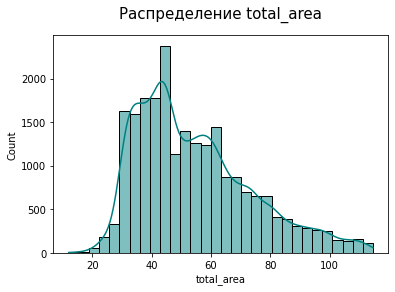

Среднее значение: 54.37
Медиана: 19.39
Стандартное отклонение: 50.1
Распределение данных имеет смещение вправо.

**************************************************

Параметр: living_area


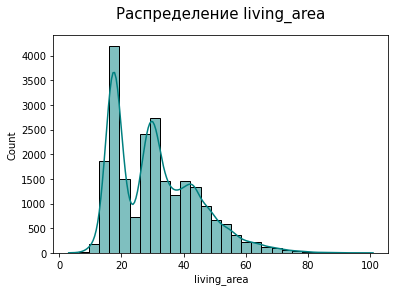

Среднее значение: 31.11
Медиана: 13.35
Стандартное отклонение: 29.7
Распределение данных имеет смещение вправо.

**************************************************

Параметр: kitchen_area


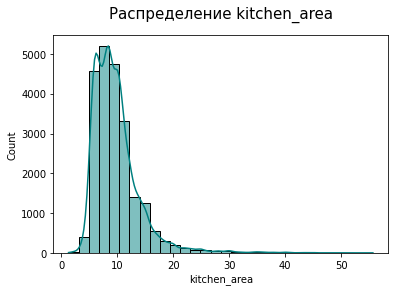

Среднее значение: 9.79
Медиана: 4.29
Стандартное отклонение: 9.0
Распределение данных имеет смещение вправо.

**************************************************

Параметр: last_price


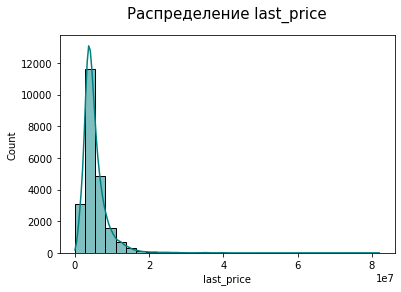

Среднее значение: 5307314.02
Медиана: 3395141.52
Стандартное отклонение: 4500000.0
Распределение данных имеет смещение вправо.

**************************************************

Параметр: rooms


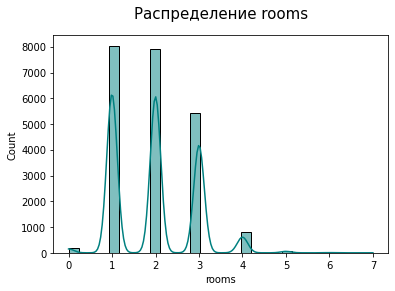

Среднее значение: 1.95
Медиана: 0.9
Стандартное отклонение: 2.0
Распределение данных имеет смещение влево.

**************************************************

Параметр: ceiling_height


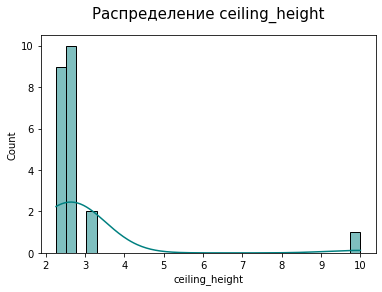

Среднее значение: 2.98
Медиана: 1.58
Стандартное отклонение: 2.7
Распределение данных имеет смещение вправо.

**************************************************

Параметр: floors_total


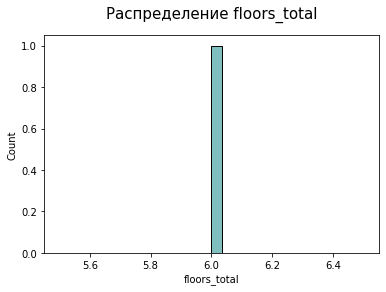

Среднее значение: 6.0
Медиана: nan
Стандартное отклонение: 6.0

**************************************************

Параметр: city_centers_nearest


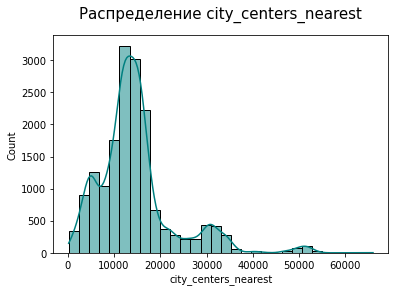

Среднее значение: 14620.74
Медиана: 8511.9
Стандартное отклонение: 13354.0
Распределение данных имеет смещение вправо.

**************************************************

Параметр: airports_nearest


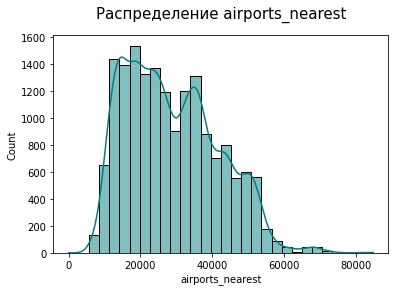

Среднее значение: 28847.72
Медиана: 12831.55
Стандартное отклонение: 26960.0
Распределение данных имеет смещение вправо.

**************************************************

Параметр: parks_nearest


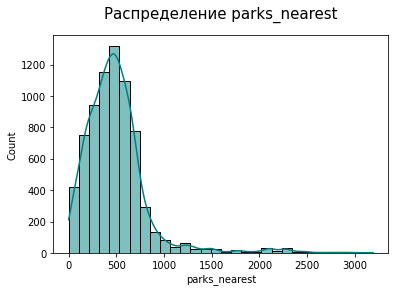

Среднее значение: 494.98
Медиана: 343.78
Стандартное отклонение: 458.0
Распределение данных имеет смещение вправо.

**************************************************

Параметр: days_exposition


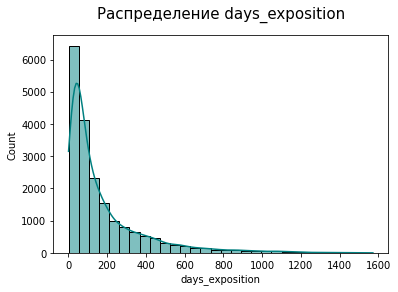

Среднее значение: 175.01
Медиана: 212.87
Стандартное отклонение: 92.0
Распределение данных имеет смещение вправо.

**************************************************



In [ ]:
describe_table = data[['total_area','living_area','kitchen_area' , 'last_price', 'rooms', 'ceiling_height', 'floors_total', 'city_centers_nearest', 'airports_nearest', 'parks_nearest', 'days_exposition']].describe()
for i in describe_table:
    print('Параметр:', i)
    sns.histplot(data[i], kde=True, bins=30, color ='teal')
    plt.title('Распределение '+i, y = 1.05, size = 15)
    plt.show()
    print('Среднее значение:', round(describe_table[i][1], 2))
    print('Медиана:', round(describe_table[i][2], 2))
    print('Стандартное отклонение:', describe_table[i][5])
    if describe_table[i][1] > describe_table[i][5]:
        print('Распределение данных имеет смещение вправо.')
    elif describe_table[i][1] < describe_table[i][5]:
        print('Распределение данных имеет смещение влево.')
    print()
    print('*'*50)
    print()

Все параметры, за исключением 'rooms' и 'floor', имеют распределение со смещением вправо.

Ближе всего к нормальному распределению параметры 'total_area' и 'airports_nearest'.

## 4.2 Рассмотрение скорости продажи квартир (столбец days_exposition).

<AxesSubplot:>

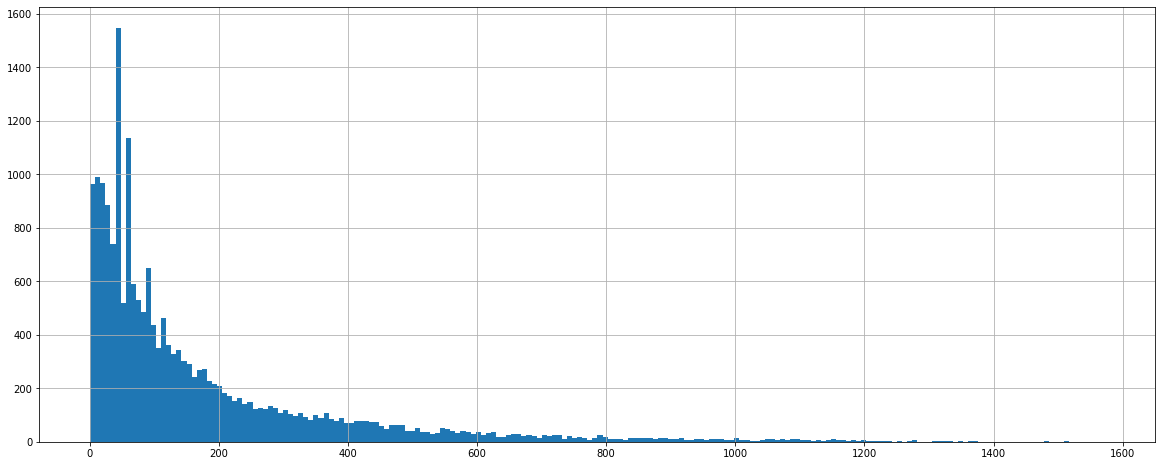

In [ ]:
 data['days_exposition'].hist(bins=200, grid=True, figsize=(20,8))

In [ ]:
print('Среднее:', data['days_exposition'].mean())
print('Медиана:', data['days_exposition'].median())

Среднее: 175.01204511815445
Медиана: 92.0


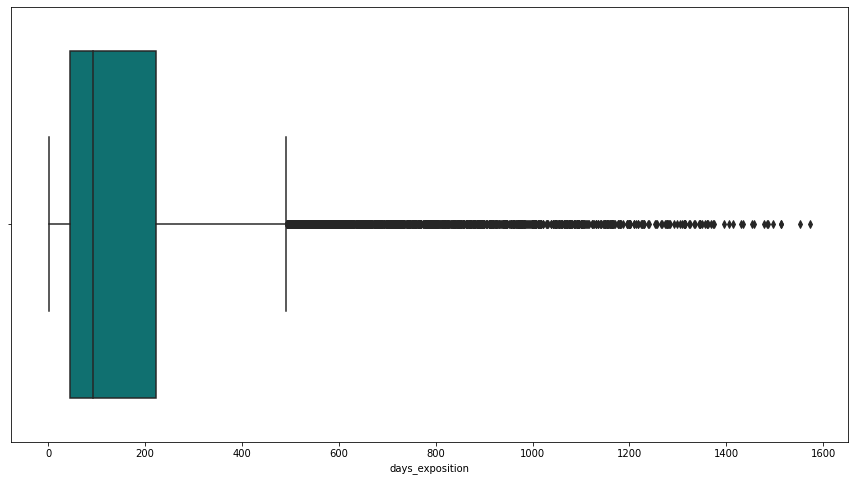

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(x = 'days_exposition', data=data, color ='teal')
plt.show()

25% всех значений в столбце 'days_exposition' ниже 44. Посмотрим, как распределены данные в первом квартиле.

<AxesSubplot:xlabel='days_exposition', ylabel='Count'>

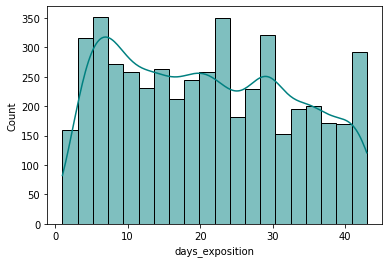

In [ ]:
sns.histplot(data[data['days_exposition']<44]['days_exposition'], kde=True, bins=20, color ='teal')

Значения распределены более-менее равномерно.

Половина всех продаж происходит в течение 95 дней. В среднем, квартиры продаются за 180 дней. Больше всего продаж происходит в срок 50-60 дней.
Встречается большое количество объявлений со сроком более 500 дней. Их можно отнести к необычно долгим продажам.

Также есть очень быстрые продажи, так 150 объектов проданы за срок менее 4 дней.

## 4.3 Факторы, больше всего влияющие на общую (полную) стоимость объекта

<AxesSubplot:>

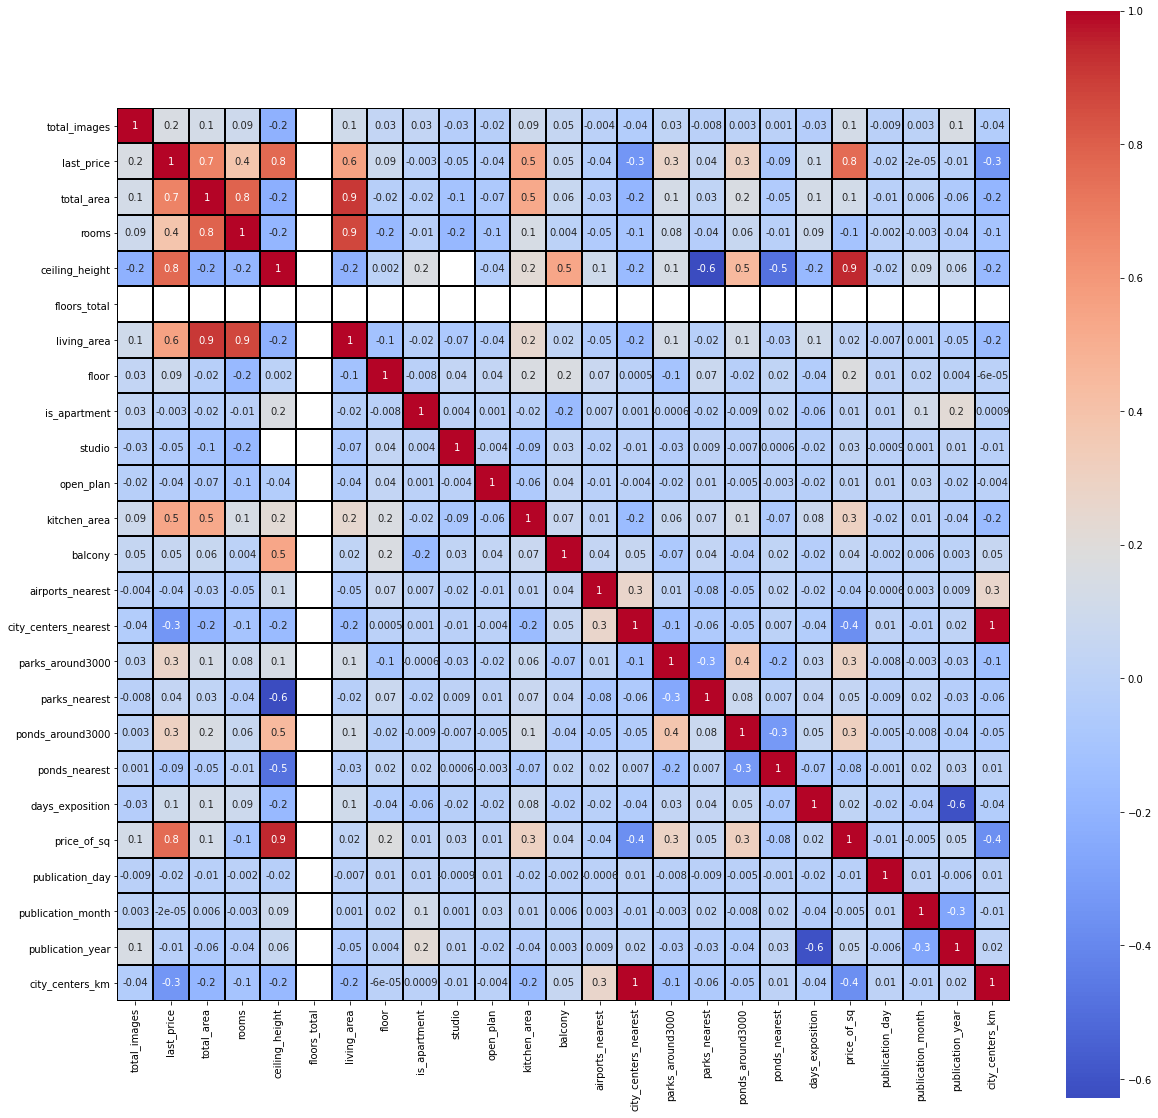

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), annot = True,  fmt='.1g', cmap = 'coolwarm', square= True, linewidths=1, linecolor='black')

Наиболее влияют на стоимость квартиры следующие параметры:
* высота потолков
* общая площадь
* жилая площадь
* площадь кухни
* количество комнат

Также есть небольшая обратная зависимость от расстояния от центра города.

<AxesSubplot:title={'center':'Зависимость от общей площади'}, xlabel='total_area', ylabel='last_price'>

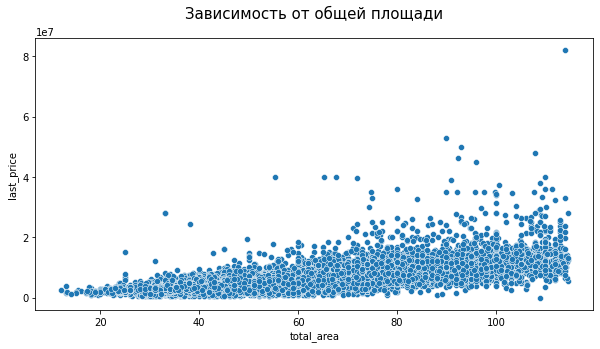

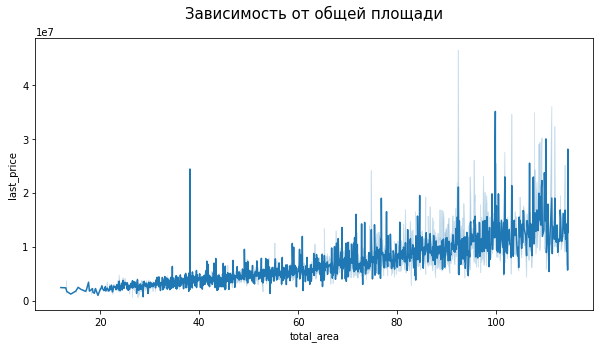

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Зависимость от общей площади', y = 1.05, size = 15)
sns.scatterplot(data=data, x='total_area', y='last_price')

plt.figure(figsize=(10,5))
plt.title('Зависимость от общей площади', y = 1.05, size = 15)
sns.lineplot(data=data, x='total_area', y='last_price')

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Зависимость от жилой площади', y = 1.05, size = 15)
sns.scatterplot(data=data, x='living_area', y='last_price')

plt.figure(figsize=(10,5))
plt.title('Зависимость от жилой площади', y = 1.05, size = 15)
sns.lineplot(data=data, x='living_area', y='last_price')

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Зависимость от площади кухни', y = 1.05, size = 15)
sns.scatterplot(data=data, x='kitchen_area', y='last_price')

plt.figure(figsize=(10,5))
plt.title('Зависимость от площади кухни', y = 1.05, size = 15)
sns.lineplot(data=data, x='kitchen_area', y='last_price')

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Зависимость от количества комнат', y = 1.05, size = 15)
sns.scatterplot(data=data, x='rooms', y='last_price')

plt.figure(figsize=(10,5))
plt.title('Зависимость от количества комнат', y = 1.05, size = 15)
sns.lineplot(data=data, x='rooms', y='last_price')

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Зависимость от этажа, на котором расположена квартира', y = 1.05, size = 15)
sns.scatterplot(data=data, x='floor_category', y='last_price')

plt.figure(figsize=(10,5))
plt.title('Зависимость от этажа, на котором расположена квартира', y = 1.05, size = 15)
sns.lineplot(data=data, x='floor_category', y='last_price')

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Зависимость от даты размещения ', y = 1.05, size = 15)
sns.scatterplot(data=data, x='first_day_exposition', y='last_price')

plt.figure(figsize=(10,5))
plt.title('Зависимость от даты размещения ', y = 1.05, size = 15)
sns.lineplot(data=data, x='first_day_exposition', y='last_price')

Изменение средней стоимости квартир по годам.

In [ ]:
pd.pivot_table(data, values='last_price', index='publication_year', aggfunc='mean').plot()

Изменение средней стоимости квадратного метра по годам.

In [ ]:
pd.pivot_table(data, values='price_of_sq', index='publication_year', aggfunc='mean').plot()

## 4.4 Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

In [ ]:
top_price_of_sq = pd.pivot_table(data[['price_of_sq','locality_name']], index=['locality_name'], aggfunc=['mean', 'count'])
top_price_of_sq.columns = ['mean_price', 'publications_count']
top10_price_of_sq = top_price_of_sq.sort_values(by='publications_count', ascending=False).head(10)
top10_price_of_sq

,mean_price,publications_count
locality_name,,
санкт-петербург,110737.486114,14579
поселок мурино,85681.762601,556
поселок шушары,78704.891847,437
всеволожск,68673.570498,395
пушкин,101960.374907,347
колпино,75370.025473,336
поселок парголово,90332.263023,326
гатчина,68919.469270,304
деревня кудрово,92409.726322,298


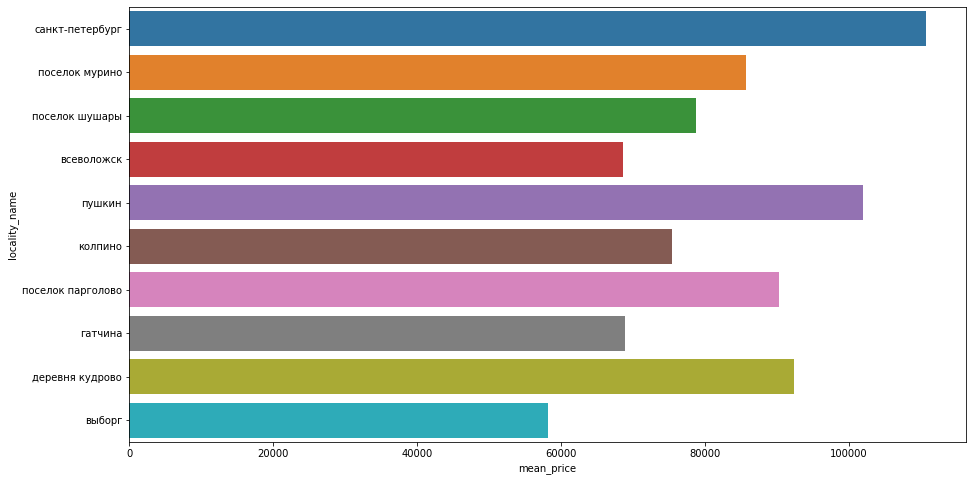

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(y=top10_price_of_sq.index, x=top10_price_of_sq['mean_price'])
plt.show()

Самая высока средня стоимость квадратного метра в Санкт-Петербурге, Пушкине и Кудрово. Самая низка - в Выборге.

## 4.5 Средняя цена каждого километра от центра в Санкт-Петербурге. 

In [ ]:
data_spb = data[data['locality_name'] == 'санкт-петербург']
a = (data_spb['price_of_sq']/(data_spb['city_centers_km'] + 0.01)).mean()
a

39650.777770914174

Полученное значение ориентировочно, так как прямой зависимости стоимости от удаленности от центра нет.

In [ ]:
data_spb[data_spb['city_centers_km'] == 0]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_of_sq,publication_day,publication_month,publication_year,floor_category,city_centers_km
1109,1,34878556,95.8,2014-12-09,2,NaN,NaN,58.300000,5,True,...,160.0,3,569.0,1572.0,364076.784969,1,12,2014,другой,0.0
1182,1,5800000,33.6,2016-03-10,1,NaN,NaN,22.800000,4,False,...,304.0,3,503.0,167.0,172619.047619,3,3,2016,другой,0.0
1934,18,9590000,108.0,2017-05-23,2,NaN,NaN,59.000000,2,False,...,359.0,3,290.0,69.0,88796.296296,1,5,2017,другой,0.0
2609,20,7200000,80.0,2017-08-24,3,NaN,NaN,43.000000,1,True,...,415.0,2,516.0,11.0,90000.000000,3,8,2017,первый,0.0
2988,2,5300000,49.0,2016-11-09,3,NaN,NaN,30.000000,3,True,...,256.0,3,305.0,232.0,108163.265306,2,11,2016,другой,0.0
3800,12,6900000,47.6,2015-07-22,2,NaN,NaN,28.200000,5,True,...,319.0,3,142.0,398.0,144957.983193,2,7,2015,другой,0.0
5297,19,45000000,96.0,2018-11-15,2,NaN,NaN,55.384615,4,True,...,160.0,3,569.0,NaN,468750.000000,3,11,2018,другой,0.0
7726,20,50000000,93.0,2019-04-18,2,NaN,NaN,40.000000,4,True,...,160.0,3,569.0,NaN,537634.408602,3,4,2019,другой,0.0
8239,10,13500000,96.9,2018-08-06,3,NaN,NaN,67.300000,3,True,...,138.0,2,657.0,14.0,139318.885449,0,8,2018,другой,0.0
8614,7,10990000,100.0,2015-12-16,3,NaN,NaN,37.800000,3,True,...,229.0,2,511.0,265.0,109900.000000,2,12,2015,другой,0.0


<AxesSubplot:xlabel='city_centers_km', ylabel='price_of_sq'>

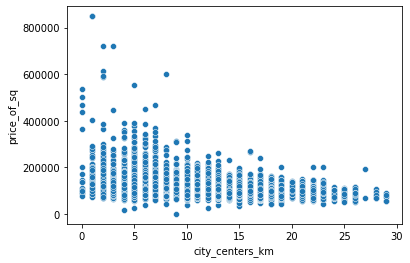

In [ ]:
sns.scatterplot(data=data_spb, y='price_of_sq', x='city_centers_km')

Влияние близости к центру на стоимость более выражено при небольших расстояниях от центра. 

# **5. Общий вывод.**

В данной работе был изучен набор данных, содержащих информацию из объявлений о продаже квартир в Санкт-Петербурге и соседних населенных пунктах.

В процессе предобработки данных были исправлены ошибки и заполнены прпуски, где это возможно. 

Как и пердполагалось, наибольшее влияние на стоимость квартиры оказывает ее площадь.

Фактор удаленности от центра выражен не явно: в самом центре цены действительно выше, но строго уменьшения по мере удаленности нет. Можно предположить, что важным фактором является транспортная доступность (близость к метро), которая компенсирует расстояние до центра. Также можно предположить, что квартиры в центре находятся в исторических зданиях, что тоже может влиять на их стоимость. 

Анализ показал, что средняя стоимость квартир с 2014 по 2017 снижалась,  увеличившись в 2018 на 9%. Средняя стоимость одного квадратного метра показывала схожую динамику до 2017 года, однако в 2018 и 2019 показала рост на 10,8%

При анализе не учитывался параметр is_apartment (апартаменты), так как почти все строки содержат пропуски. Возможно, данный параметр может влиять на стоимость.

